## Exercise Image Processing
1. Download beberapa gambar yang ada di internet atau koleksi pribadi.
2. Gunakan Numpy untuk melakukan processing sederhana seperti flip horizontal atau vertical.
3. Gunakan setiap teknik Image Processing dibawah ini terhadap gambar yang berbeda-beda:
 * Thresholding
 * Filtering
 * Contrast Enhancement
 * Transformation
 * Edge Detection
 * Corner Detection
4. Coba menggunakan foto pribadi atau foto yang tersedia di internet. 
 * Terapkan Face Detection menggunakan Cascade Classifier

In [3]:
from skimage import data, color
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type) 
    plt.title(title)
    plt.axis('off')
    plt.show()


In [7]:
foto = plt.imread('C:\\Users\\USER\\Pictures\\dinner.jpg')
type(foto)

numpy.ndarray

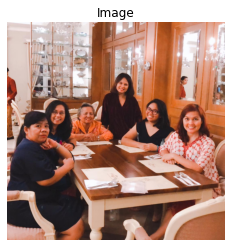

In [8]:
show_image(foto)

In [9]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

In [11]:
gray_tools_image= rgb2gray(foto)
gray_tools_image

array([[0.87918941, 0.88311098, 0.89095412, ..., 0.73682667, 0.73682667,
        0.73682667],
       [0.86350314, 0.86742471, 0.87134627, ..., 0.73850824, 0.73850824,
        0.73850824],
       [0.84781686, 0.85173843, 0.85173843, ..., 0.74213922, 0.74213922,
        0.74213922],
       ...,
       [0.62462431, 0.62462431, 0.62125333, ..., 0.36858431, 0.37250588,
        0.37250588],
       [0.6251749 , 0.62068784, 0.61759961, ..., 0.36466275, 0.37250588,
        0.37250588],
       [0.62544275, 0.62095569, 0.61197373, ..., 0.36466275, 0.36858431,
        0.37250588]])

In [13]:
thresh= threshold_otsu(gray_tools_image)
thresh

0.48618495481004903

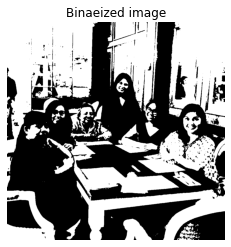

In [14]:
binary_image= gray_tools_image > thresh
show_image(binary_image, 'Binaeized image')

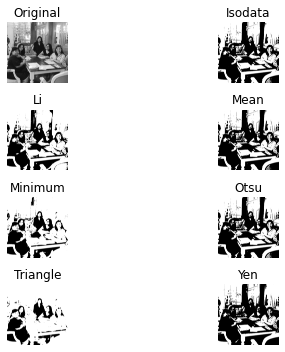

In [15]:
from skimage.filters import try_all_threshold
grayscale = rgb2gray(foto)
fig, ax= try_all_threshold(grayscale, verbose=False)
plt.show()

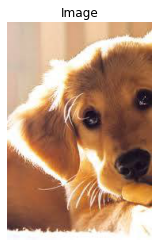

In [18]:
foto_dog = plt.imread('C:\\Users\\USER\\Pictures\\dog.jpg')
show_image(foto_dog)

<ipython-input-20-c4c36d3b2ade>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  foto_dog = color.rgb2gray(foto_dog)


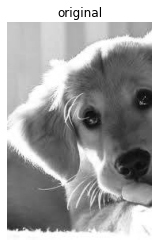

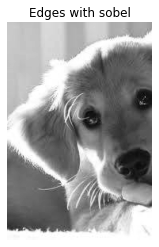

In [20]:
from skimage import color
from skimage.filters import sobel
foto_dog = color.rgb2gray(foto_dog)
edge_sobel = sobel(foto_dog)
show_image(foto_dog, 'original')
show_image(foto_dog, 'Edges with sobel')

In [25]:
foto_city = plt.imread('C:\\Users\\USER\\Pictures\\city.jpg')


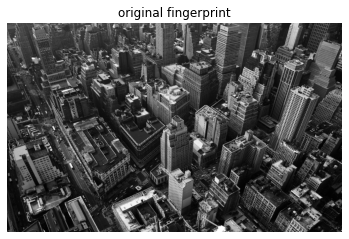

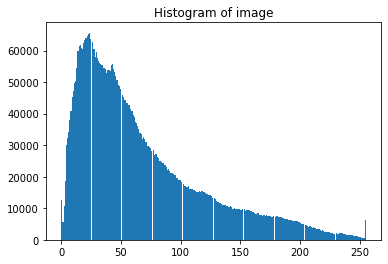

In [26]:
from skimage import exposure
show_image(foto_city, 'original fingerprint')
plt.title('Histogram of image')
plt.hist(foto_city.ravel(), bins=265)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


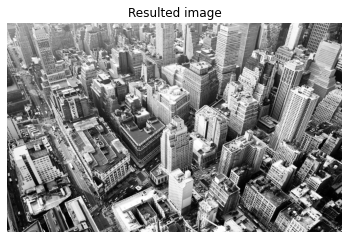

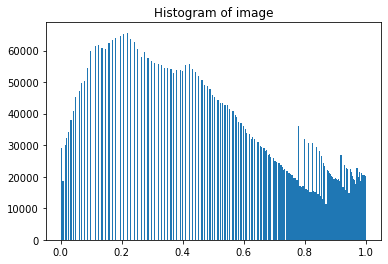

In [27]:
city_image_eq = exposure.equalize_hist(foto_city)
show_image(city_image_eq, 'Resulted image')
plt.title('Histogram of image')
plt.hist(city_image_eq.ravel(), bins=265)
plt.show()

In [28]:
from skimage.transform import rotate, rescale

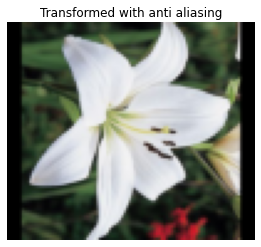

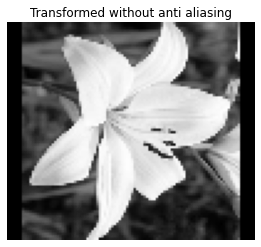

In [31]:
foto_lily = plt.imread('C:\\Users\\USER\\Pictures\\lily.jpg')
rotated_lily_image = rotate(foto_lily, -90)
rescaled_with_aa = rescale(rotated_lily_image, 1/4, anti_aliasing=True, multichannel=True)
rescaled_without_aa = rescale(rotated_lily_image, 1/4, anti_aliasing=False, multichannel=False)
show_image(rescaled_with_aa, 'Transformed with anti aliasing')
show_image(rescaled_without_aa, 'Transformed without anti aliasing')

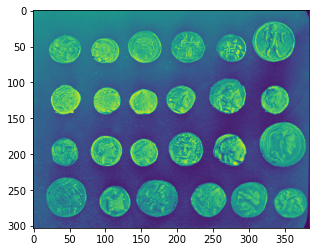

In [37]:
plt.imshow(gambar_koin)

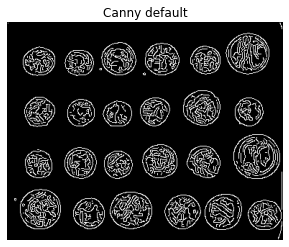

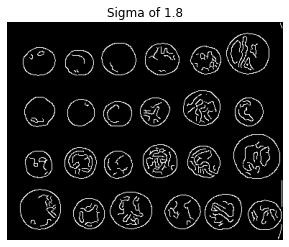

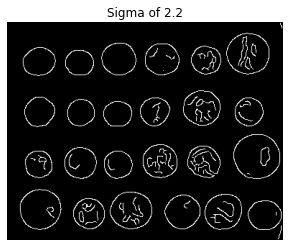

In [41]:
from skimage.feature import canny
canny_edges = canny(gambar_koin)
edges_1_8 = canny(gambar_koin, sigma=1.8)
edges_2_2 = canny(gambar_koin, sigma=2.2)
show_image(canny_edges, 'Canny default')
show_image(edges_1_8, 'Sigma of 1.8')
show_image(edges_2_2, 'Sigma of 2.2')

In [42]:
foto_sudutgedung = plt.imread('C:\\Users\\USER\\Pictures\\sudut gedung.jpg')

<ipython-input-44-e635b62b6826>:4: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  coords = corner_peaks(measure_image, min_distance=2)


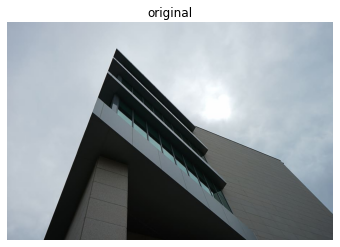

NameError: name 'show_image_with_corners' is not defined

In [44]:
from skimage.feature import corner_harris, corner_peaks
building_image_gray = color.rgb2gray(foto_sudutgedung)
measure_image = corner_harris(building_image_gray)
coords = corner_peaks(measure_image, min_distance=2)
show_image(foto_sudutgedung, 'original')
show_image_with_corners(foto_sudutgedung, coords)

In [45]:
from matplotlib import patches
def show_detected_face(result, detected, title='face_image'):
    plt.imshow(result)
    img_desc=plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
        patches.Rectangle(
        (patch['c'], patch['r']), 
        patch['width'], 
        patch['height'],
        fill=False, color='r', linewidth=2)
        )
    plt.show()

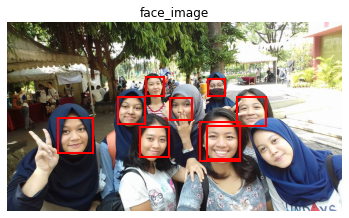

In [52]:
from skimage import data
from skimage.feature import Cascade

gambar_wajah = plt.imread('C:\\Users\\USER\\Pictures\\face.jpg')
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)
detected = detector.detect_multi_scale(img = gambar_wajah,
                                     scale_factor=1.2,
                                     step_ratio=1,
                                     min_size=(10,10),
                                     max_size=(200,200))

show_detected_face(gambar_wajah, detected)